In [41]:
# Changing working directory to load csv file correctly
import os
os.chdir('/Users/kai23/Library/Mobile Documents/com~apple~CloudDocs/MSc Data Science/Skills for DS/Skills Assessment 2')
print("Working Directory Changed To:", os.getcwd())

Working Directory Changed To: /Users/kai23/Library/Mobile Documents/com~apple~CloudDocs/MSc Data Science/Skills for DS/Skills Assessment 2


In [42]:
import pandas as pd

# Loading the cleaned_authors dataset
authors = pd.read_csv('./outputs/authors_cleaned.csv')

# Inspecting the data
print(authors.info())
print(authors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56892 entries, 0 to 56891
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               56892 non-null  int64 
 1   AuthorN            56892 non-null  int64 
 2   AuthorForename     56892 non-null  object
 3   AuthorLastname     56892 non-null  object
 4   AuthorInitials     56815 non-null  object
 5   AuthorAffiliation  56892 non-null  object
 6   AuthorsPerPaper    56892 non-null  int64 
 7   AuthorFullName     56892 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.5+ MB
None
       PMID  AuthorN AuthorForename AuthorLastname AuthorInitials  \
0  10545039        1            K E       Morrison             KE   
1  10545039        2              G         Steers              G   
2  10545039        3              V       Dubowitz              V   
3  10558867        1            M L         Brandi             ML   
4  10558867        2  

Top 10 Authors and Their Affiliations:
David A Bennett (Rush Alzheimer'S Disease Center, Rush University Medical Center, Chicago, Il.)
Clifford R Jack (Mayo Clinic, Rochester, Minnesota)
Kewei Chen (Banner Alzheimer'S Institute, Phoenix, Az.)
Dennis W Dickson (Mayo Clinic, Jacksonville, Florida)
Henrik Zetterberg (Department Of Psychiatry And Neurochemistry, Institute Of Neuroscience And Physiology, The Sahlgrenska Academy At The University Of Gothenburg, Mölndal.)
Kaj Blennow (Department Of Psychiatry And Neurochemistry, Institute Of Neuroscience And Physiology, The Sahlgrenska Academy At The University Of Gothenburg, Mölndal.)
Ronald C Petersen (Department Of Neurology, Mayo Clinic, Rochester, Mn.)
Guojun Bu (Mayo Clinic, Jacksonville, Florida)
Nancy L Pedersen (Department Of Medical Epidemiology And Biostatistics, Karolinska Institutet, Stockholm.)
David S Knopman (Department Of Neurology, Mayo Clinic, Rochester, Mn.)


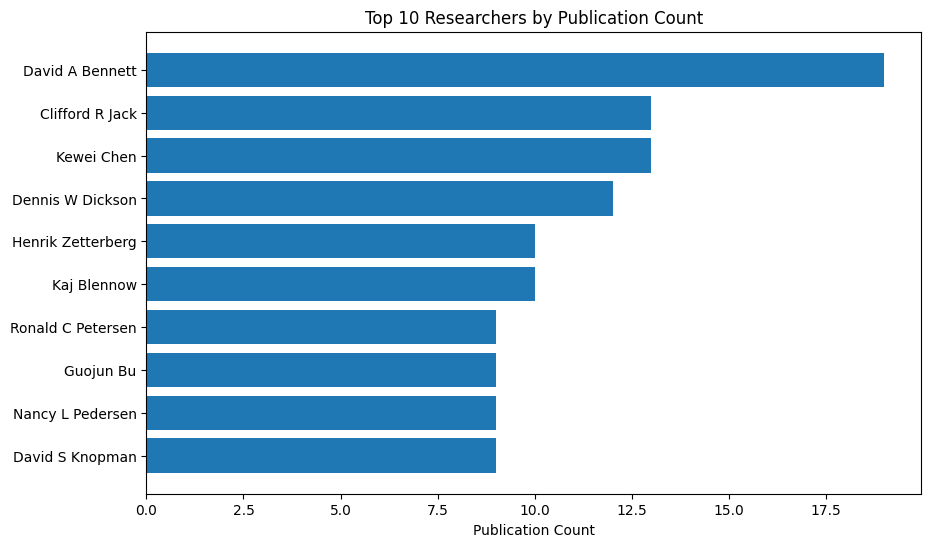

In [43]:
import matplotlib.pyplot as plt

# Counting number of papers per author
publications = authors.groupby(['AuthorFullName', 'AuthorAffiliation'])['PMID'].nunique().reset_index()
publications.columns = ['AuthorFullName', 'AuthorAffiliation', 'PublicationCount']

# Sorting by the number of publications
top_authors = publications.sort_values(by='PublicationCount', ascending=False)

# Filtering for the top 10 authors
top_10_authors = top_authors.head(10)

# Printing the list of top 10 authors with their affiliations
print("Top 10 Authors and Their Affiliations:")
for index, row in top_10_authors.iterrows():
    print(f"{row['AuthorFullName']} ({row['AuthorAffiliation']})")

# Plotting top 10 authors with the most publications
plt.figure(figsize=(10, 6))
plt.barh(top_10_authors['AuthorFullName'], top_10_authors['PublicationCount'], color = 'tab:blue')
plt.xlabel('Publication Count')
plt.title('Top 10 Researchers by Publication Count')
plt.gca().invert_yaxis()
plt.savefig('./outputs/top_10_researchers.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 First Authors and Their Affiliations:
Nicholas Brookhouser (School Of Biological And Health Systems Engineering, Arizona State University, Tempe, Az.)
Laia Guardia-Escote (Research In Neurobehavior And Health (Neurolab), Universitat Rovira I Virgili, Tarragona, Spain; Department Of Biochemistry And Biotechnology, Universitat Rovira I Virgili, Tarragona, Spain; Laboratory Of Toxicology And Environmental Health, School Of Medicine, Iispv, Universitat Rovira I Virgili, Reus, Spain.)
Tetsuro Yoshida (Department Of Cardiovascular Medicine, Inabe General Hospital, Inabe, Japan.)
Daniela Scarabino (Cnr Institute Of Cellular Biology And Neurobiology, Monterotondo Scalo, Rome, Italy.)
Clifford R Jack (Mayo Clinic, Rochester, Minnesota)
Lilian Calderón-Garcidueñas (Instituto Nacional De Pediatría, Mexico City, Mexico. Lilian.Calderon-Garciduenas@Umontana.Edu)
Binbin Wang (Center For Human And Animal Genetics, Institute Of Genetics And Developmental Biology, Chinese Academy Of Sciences, Be

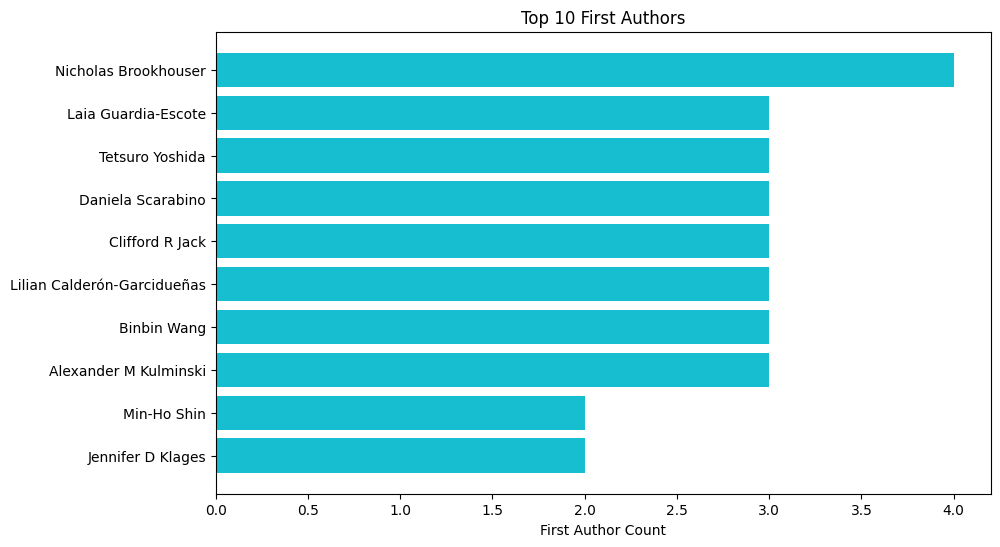

In [44]:
# Filter for first authors in publications
first_authors = authors[authors['AuthorN'] == 1]

# Counting the number of first author papers
first_publications = first_authors.groupby(['AuthorFullName', 'AuthorAffiliation'])['PMID'].nunique().reset_index()
first_publications.columns = ['AuthorFullName', 'AuthorAffiliation', 'FirstAuthorCount']

# Sort by first authors
top_first_authors = first_publications.sort_values(by='FirstAuthorCount', ascending=False)

# Filtering for top 10 first authors
top_10_first = top_first_authors.head(10)

# Printing the list of top 10 first authors with their affiliations
print("Top 10 First Authors and Their Affiliations:")
for index, row in top_10_first.iterrows():
    print(f"{row['AuthorFullName']} ({row['AuthorAffiliation']})")

# Plotting graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_first['AuthorFullName'], top_10_first['FirstAuthorCount'], color = 'tab:cyan')
plt.xlabel('First Author Count')
plt.title('Top 10 First Authors')
plt.gca().invert_yaxis()
plt.savefig('./outputs/top_10_first_authors.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

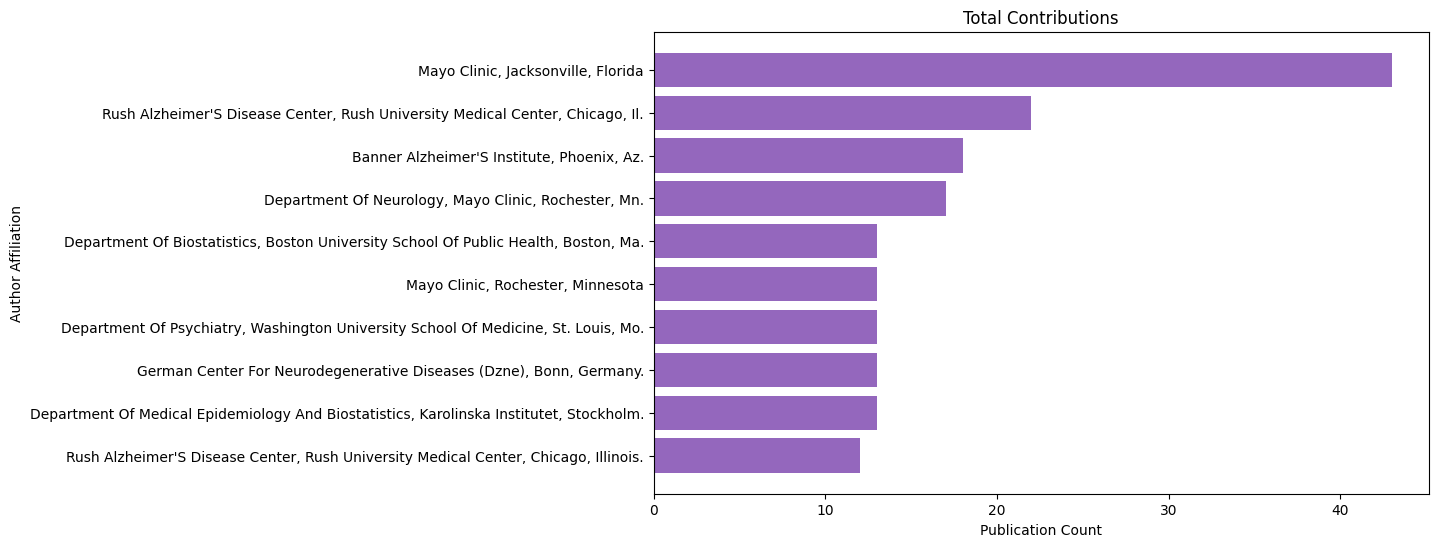

In [45]:
# Group by affiliation
affiliations = authors.groupby('AuthorAffiliation')['PMID'].nunique().reset_index()
affiliations.columns = ['AuthorAffiliation', 'TotalContributions']

# Filtering out "Unknown" affiliations
affiliations = affiliations[affiliations['AuthorAffiliation'] != 'Unknown']

# Sorting and selecting top 10 affiliations/organisations
top_10_affiliations = affiliations.sort_values(by='TotalContributions', ascending=False).head(10)

# Plotting the data
top_10_affiliations = affiliations.sort_values(by='TotalContributions', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_affiliations['AuthorAffiliation'], top_10_affiliations['TotalContributions'], color = 'tab:purple')
plt.ylabel('Author Affiliation')
plt.xlabel('Publication Count')
plt.title('Total Contributions')
plt.gca().invert_yaxis()
plt.savefig('./outputs/affiliation_contributions.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
from pyvis.network import Network
import networkx as nx

# Counting unique papers for each author
author_publications = authors.groupby('AuthorFullName')['PMID'].nunique().reset_index()
author_publications.columns = ['AuthorFullName', 'PublicationCount']

# Filtering for top 30 authors
top_30_authors = author_publications.sort_values(by='PublicationCount', ascending=False).head(30)['AuthorFullName'].tolist()
filtered_authors = authors[authors['AuthorFullName'].isin(top_30_authors)]

# Creating collaboration network
G = nx.Graph()
for pmid, group in filtered_authors.groupby('PMID'):
    authors_in_paper = group['AuthorFullName'].tolist()
    for i, author1 in enumerate(authors_in_paper):
        for author2 in authors_in_paper[i + 1:]:
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Filtering for only strong edges and top nodes to increase readability
G = nx.Graph(((u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= 2))
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]
G = G.subgraph([node for node, _ in top_nodes])

# Creating PyVis network
net = Network(notebook=True, width="1500px", height="1500px", bgcolor="#222222", font_color="white")

# Creating layout for readability
pos = nx.spring_layout(G, k=0.5, seed=42)
for node, coord in pos.items():
    size = max(10, min(G.degree[node] * 10, 50))
    net.add_node(node, label=node, x=coord[0] * 1000, y=coord[1] * 1000, size=size)

for u, v, data in G.edges(data=True):
    net.add_edge(u, v, value=data['weight'])

# Adjusting physics settings
net.set_options("""
var options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -20000,
      "centralGravity": 0.1,
      "springLength": 150,
      "springConstant": 0.05,
      "damping": 0.09
    }
  },
  "nodes": {
    "scaling": {
      "min": 10,
      "max": 50
    }
  }
}
""")

# Saving graph
net.show('./outputs/collaboration_network_top_30_authors.html')

./outputs/collaboration_network_top_30_authors.html
